Date: 30Nov2022

Author: Lynn Menchaca

Resources:
- Youtube channel: codebasics -> Data Science Project|Machine Learning Project|Sports Celebrity Image Classification
    https://www.youtube.com/playlist?list=PLeo1K3hjS3uvaRHZLl-jLovIjBP14QTXc
- Youtube channel: Learn Code By Gaming -> Training a Cascade classifier - OpenCV Object Detection in Games #8
    https://www.youtube.com/watch?v=XrCAvs9AePM
- to find images: image-net.org
- OpenCV-Python Tutorials -> Face Detection using Haar Cascades
    https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_objdetect/py_face_detection/py_face_detection.html

Manually cleaned non simpson characters from each folder

In [9]:
import pandas as pd
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
#Trying to see what version of cv2 is being used
print(cv2.__version__)

4.6.0


In [4]:
image_file_path = '/Users/lynnpowell/Documents/DS_Projects/Data_Files/Simpson_Images/'
pos_file_path = '/Users/lynnpowell/Documents/DS_Projects/Data_Files/Simpson_Images/positive/'

In [5]:
#pulling the first Homer Simpson image
homer_simp = image_file_path+'homer_simpson/22.jpg'
img = cv2.imread(homer_simp)
img.shape

(1050, 1400, 3)

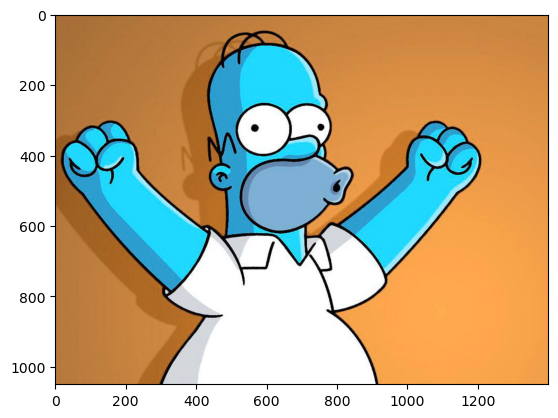

In [6]:
plt.imshow(img)

shape:  (1050, 1400)


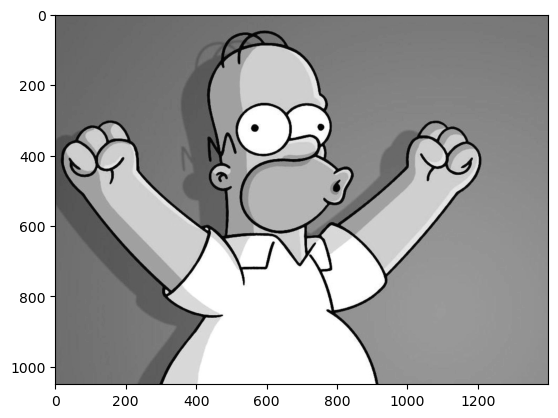

In [7]:
#black and white of image
homer_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#if need to resize
#homer_gray = cv2.resize(homer_gray, (1000,1000))
#shape
print('shape: ', homer_gray.shape)
#array
homer_gray
#image
plt.imshow(homer_gray, cmap='gray')

In [29]:
# used opencv_annotation.exe to create postivie files for each simpson character

bart_df = pd.read_csv(pos_file_path+'pos_bart.txt', sep=" ", header=None, on_bad_lines='skip')
bart_df.columns = ["path", "char_count", "x", "y", "width", "height"]
bart_df.head()

,path,char_count,x,y,width,height
0,C:/Users/ymenc/OneDrive/Desktop/Simpson_Images...,1,79.0,4.0,107.0,117.0
1,C:/Users/ymenc/OneDrive/Desktop/Simpson_Images...,1,58.0,39.0,98.0,108.0
2,C:/Users/ymenc/OneDrive/Desktop/Simpson_Images...,1,283.0,3.0,260.0,374.0
3,C:/Users/ymenc/OneDrive/Desktop/Simpson_Images...,1,65.0,0.0,110.0,130.0
4,C:/Users/ymenc/OneDrive/Desktop/Simpson_Images...,1,81.0,14.0,66.0,90.0


In [30]:
bart_df[bart_df['char_count']==0]

,path,char_count,x,y,width,height
7,C:/Users/ymenc/OneDrive/Desktop/Simpson_Images...,0,NaN,NaN,NaN,NaN
10,C:/Users/ymenc/OneDrive/Desktop/Simpson_Images...,0,NaN,NaN,NaN,NaN
12,C:/Users/ymenc/OneDrive/Desktop/Simpson_Images...,0,NaN,NaN,NaN,NaN
14,C:/Users/ymenc/OneDrive/Desktop/Simpson_Images...,0,NaN,NaN,NaN,NaN
28,C:/Users/ymenc/OneDrive/Desktop/Simpson_Images...,0,NaN,NaN,NaN,NaN
40,C:/Users/ymenc/OneDrive/Desktop/Simpson_Images...,0,NaN,NaN,NaN,NaN


In [31]:
# drop all the rows with 0 characters identified in the photo

bart_zero_idx = bart_df[bart_df['char_count']==0].index
bart_df.drop(bart_zero_idx, inplace=True)
bart_df.reset_index(drop=True,inplace=True)
#bart_df[bart_df['char_count']==0].head()
print(bart_df.shape)
bart_df.head()

(42, 6)


,path,char_count,x,y,width,height
0,C:/Users/ymenc/OneDrive/Desktop/Simpson_Images...,1,79.0,4.0,107.0,117.0
1,C:/Users/ymenc/OneDrive/Desktop/Simpson_Images...,1,58.0,39.0,98.0,108.0
2,C:/Users/ymenc/OneDrive/Desktop/Simpson_Images...,1,283.0,3.0,260.0,374.0
3,C:/Users/ymenc/OneDrive/Desktop/Simpson_Images...,1,65.0,0.0,110.0,130.0
4,C:/Users/ymenc/OneDrive/Desktop/Simpson_Images...,1,81.0,14.0,66.0,90.0


In [43]:
print(bart_df.dtypes)
pd.options.display.max_colwidth = 100
#pd.set_options('display.max_colwidth', -1)
bart_df['path'].head()

path           object
char_count      int64
x             float64
y             float64
width         float64
height        float64
dtype: object


0      C:/Users/ymenc/OneDrive/Desktop/Simpson_Images/bart_simpson\1.jpg
1    C:/Users/ymenc/OneDrive/Desktop/Simpson_Images/bart_simpson\105.jpg
2    C:/Users/ymenc/OneDrive/Desktop/Simpson_Images/bart_simpson\106.jpg
3    C:/Users/ymenc/OneDrive/Desktop/Simpson_Images/bart_simpson\107.jpg
4    C:/Users/ymenc/OneDrive/Desktop/Simpson_Images/bart_simpson\108.jpg
Name: path, dtype: object

In [50]:
#correct file path to point to images on desktop
old_path = 'C:/Users/ymenc/OneDrive/Desktop/'
new_path = '/Users/lynnpowell/Documents/DS_Projects/Data_Files/'
bart_df['path'] = bart_df['path'].str.replace(r'\\','/', regex=True)
bart_df['path'] = bart_df['path'].str.replace(old_path,new_path, regex=True)

bart_df['path'].head()

0      /Users/lynnpowell/Documents/DS_Projects/Data_Files/Simpson_Images/bart_simpson/1.jpg
1    /Users/lynnpowell/Documents/DS_Projects/Data_Files/Simpson_Images/bart_simpson/105.jpg
2    /Users/lynnpowell/Documents/DS_Projects/Data_Files/Simpson_Images/bart_simpson/106.jpg
3    /Users/lynnpowell/Documents/DS_Projects/Data_Files/Simpson_Images/bart_simpson/107.jpg
4    /Users/lynnpowell/Documents/DS_Projects/Data_Files/Simpson_Images/bart_simpson/108.jpg
Name: path, dtype: object

In [51]:
# Homer
homer_df = pd.read_csv(pos_file_path+'pos_homer.txt', sep=" ", header=None, on_bad_lines='skip')
homer_df.columns = ["path", "char_count", "x", "y", "width", "height"]

# drop all the rows with 0 characters identified in the photo
homer_zero_idx = homer_df[homer_df['char_count']==0].index
homer_df.drop(homer_zero_idx, inplace=True)
homer_df.reset_index(drop=True,inplace=True)
homer_df['path'] = homer_df['path'].str.replace(r'\\','/', regex=True)
homer_df['path'] = homer_df['path'].str.replace(old_path,new_path, regex=True)
print(homer_df.shape)
homer_df.head()

(78, 6)


,path,char_count,x,y,width,height
0,/Users/lynnpowell/Documents/DS_Projects/Data_Files/Simpson_Images/homer_simpson/1.jpg,1,821.0,260.0,241.0,235.0
1,/Users/lynnpowell/Documents/DS_Projects/Data_Files/Simpson_Images/homer_simpson/100.jpg,1,259.0,0.0,292.0,379.0
2,/Users/lynnpowell/Documents/DS_Projects/Data_Files/Simpson_Images/homer_simpson/102.jpg,1,129.0,6.0,63.0,67.0
3,/Users/lynnpowell/Documents/DS_Projects/Data_Files/Simpson_Images/homer_simpson/104.jpg,1,28.0,7.0,75.0,96.0
4,/Users/lynnpowell/Documents/DS_Projects/Data_Files/Simpson_Images/homer_simpson/106.jpg,1,337.0,15.0,464.0,673.0


In [52]:
# Lisa
lisa_df = pd.read_csv(pos_file_path+'pos_lisa.txt', sep=" ", header=None, on_bad_lines='skip')
lisa_df.columns = ["path", "char_count", "x", "y", "width", "height"]

# drop all the rows with 0 characters identified in the photo
lisa_zero_idx = lisa_df[lisa_df['char_count']==0].index
lisa_df.drop(lisa_zero_idx, inplace=True)
lisa_df.reset_index(drop=True,inplace=True)
lisa_df['path'] = lisa_df['path'].str.replace(r'\\','/', regex=True)
lisa_df['path'] = lisa_df['path'].str.replace(old_path,new_path, regex=True)
print(lisa_df.shape)
lisa_df.head()

(74, 6)


,path,char_count,x,y,width,height
0,/Users/lynnpowell/Documents/DS_Projects/Data_Files/Simpson_Images/lisa_simpson/100.jpg,1,246.0,23.0,241.0,251.0
1,/Users/lynnpowell/Documents/DS_Projects/Data_Files/Simpson_Images/lisa_simpson/101.jpg,1,57.0,2.0,318.0,256.0
2,/Users/lynnpowell/Documents/DS_Projects/Data_Files/Simpson_Images/lisa_simpson/103.jpg,1,101.0,0.0,120.0,122.0
3,/Users/lynnpowell/Documents/DS_Projects/Data_Files/Simpson_Images/lisa_simpson/105.jpg,1,98.0,11.0,105.0,123.0
4,/Users/lynnpowell/Documents/DS_Projects/Data_Files/Simpson_Images/lisa_simpson/106.jpg,1,1.0,1.0,498.0,449.0


In [53]:
# Maggie
maggie_df = pd.read_csv(pos_file_path+'pos_maggie.txt', sep=" ", header=None, on_bad_lines='skip')
maggie_df.columns = ["path", "char_count", "x", "y", "width", "height"]

# drop all the rows with 0 characters identified in the photo
maggie_zero_idx = maggie_df[maggie_df['char_count']==0].index
maggie_df.drop(maggie_zero_idx, inplace=True)
maggie_df.reset_index(drop=True,inplace=True)
maggie_df['path'] = maggie_df['path'].str.replace(r'\\','/', regex=True)
maggie_df['path'] = maggie_df['path'].str.replace(old_path,new_path, regex=True)
print(maggie_df.shape)
maggie_df.head()

(77, 6)


,path,char_count,x,y,width,height
0,/Users/lynnpowell/Documents/DS_Projects/Data_Files/Simpson_Images/maggie_simpson/1.jpg,1,35.0,4.0,144.0,131.0
1,/Users/lynnpowell/Documents/DS_Projects/Data_Files/Simpson_Images/maggie_simpson/100.jpg,1,141.0,4.0,154.0,156.0
2,/Users/lynnpowell/Documents/DS_Projects/Data_Files/Simpson_Images/maggie_simpson/101.jpg,1,1.0,4.0,180.0,170.0
3,/Users/lynnpowell/Documents/DS_Projects/Data_Files/Simpson_Images/maggie_simpson/102.jpg,1,27.0,11.0,108.0,91.0
4,/Users/lynnpowell/Documents/DS_Projects/Data_Files/Simpson_Images/maggie_simpson/103.jpg,1,65.0,5.0,140.0,100.0


In [54]:
# Marge
marge_df = pd.read_csv(pos_file_path+'pos_marge.txt', sep=" ", header=None, on_bad_lines='skip')
marge_df.columns = ["path", "char_count", "x", "y", "width", "height"]

# drop all the rows with 0 characters identified in the photo
marge_zero_idx = marge_df[marge_df['char_count']==0].index
marge_df.drop(marge_zero_idx, inplace=True)
marge_df.reset_index(drop=True,inplace=True)
marge_df['path'] = homer_df['path'].str.replace(r'\\','/', regex=True)
marge_df['path'] = homer_df['path'].str.replace(old_path,new_path, regex=True)
print(marge_df.shape)
marge_df.head()

(67, 6)


,path,char_count,x,y,width,height
0,/Users/lynnpowell/Documents/DS_Projects/Data_Files/Simpson_Images/homer_simpson/1.jpg,1,126.0,35.0,215.0,338.0
1,/Users/lynnpowell/Documents/DS_Projects/Data_Files/Simpson_Images/homer_simpson/100.jpg,1,49.0,39.0,122.0,132.0
2,/Users/lynnpowell/Documents/DS_Projects/Data_Files/Simpson_Images/homer_simpson/102.jpg,1,917.0,35.0,308.0,407.0
3,/Users/lynnpowell/Documents/DS_Projects/Data_Files/Simpson_Images/homer_simpson/104.jpg,1,61.0,2.0,66.0,73.0
4,/Users/lynnpowell/Documents/DS_Projects/Data_Files/Simpson_Images/homer_simpson/106.jpg,1,112.0,3.0,61.0,110.0


(1152, 2048, 3)


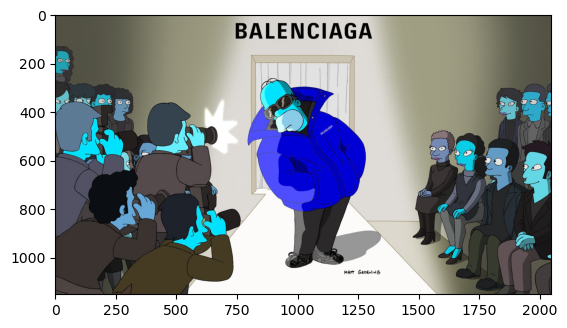

In [56]:
#pulling the first Homer Simpson image
homer_simp = homer_df['path'].iloc[0]
img = cv2.imread(homer_simp)
print(img.shape)
plt.imshow(img)